In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
import copy

In [2]:
def define_media(iflaga):
    global nx, ny, mxst, mxnd, myst, mynd, mediaEz, mediaHx, mediaHy




    if (iflaga == 2):
        for  i in range(nx):
            for j in range(ny):
                if (i >= mxst-1) and (i <= mxnd-1):
                    if ( j >= myst-1) and (j <= mynd-1):
                        mediaEz[i,j] = 2
        
        for  i in range(nx):
            for j in range(ny):
                if (i >= mxst-1) and (i <= mxnd-1):
                    if ( j >= myst-1) and (j <= mynd-2):
                        mediaHx[i,j] = 2

        for  i in range(nx):
            for j in range(ny):
                if (i >= mxst-1) and (i <= mxnd-2):
                    if ( j >= myst-1) and (j <= mynd-1):
                        mediaHy[i,j] = 2

In [3]:
def define_coefficients():

    global Ca, Cb, Da, Db  # Define material based coefficients
    global xmu, eps0, dt, ds
    Ca = np.zeros((2, 1))
    Cb = np.zeros((2, 1))
    Da = np.zeros((2, 1))
    Db = np.zeros((2, 1))
    # Field Coefficients
    dte = dt/(ds*eps0)
    dtm = dt/(ds*xmu)
    Da[0] = 1
    Db[0] = dtm
    Ca[0] = 1
    Cb[0] = dte
    Da[1] = 0
    Db[1] = 0
    Ca[1] = 0
    Cb[1] = 0

In [4]:
def Source(n, sources):
    global Ezs
    # Creates a half-sinusoidal source between the time increments
    # 1 and 10.%
    # When source = 1 : Sinusoid
    #               2 : Gaussian
    #
    ## For Gaussian Source
    if sources == 2:
            xndec = 10.0
            xn0 = 4*xndec
            Ezs = math.exp(-((n-xn0)/(xndec))**2)
        ## For Sinusoidal Source
    elif sources == 1:
        if ( n >=1-1) and (n <= 10-1):
            Ezs = math.sin(n*math.pi/10)
    return Ezs

In [5]:
def adv_Ez(n, sources):
    global Ez, Hx, Hy
    global mediaEz
    global Ca, Cb
    global nx, ny
    for i in range(nx):
        for j in range(ny):
            m  = int(mediaEz[i, j]-1)
            if (i == 0):
                Ez[i, j] = Source(n, sources)
            elif (i >= 1 and j >=1):
                Ez[i, j] = Ez[i, j]*Ca[m] + Cb[m]*(Hy[i, j] - Hy[i-1, j] - (Hx[i, j] - Hx[i, j-1]))
            elif (j == 0):
                Ez[i, j] = Ez[i, j]*Ca[m] + Cb[m]*(Hy[i, j] - Hy[i-1, j]- Hx[i, j])

In [6]:
def adv_H(n):
    global Ez, Hx, Hy
    global mediaHx, mediaHy
    global Da, Db
    global nx, ny
    for i in range(nx):
        for j in range(ny-1):
            m = int(mediaHx[i, j]-1)
            Hx[i, j] = Hx[i, j]*Da[m] - Db[m]*(Ez[i, j+1] - Ez[i, j])
    for i in range(nx-1):
        for j in range(ny):
            m = int(mediaHy[i, j]-1)
            Hy[i, j] = Hy[i, j]*Da[m] + Db[m]*(Ez[i+1, j] - Ez[i, j])

In [7]:
def my_surface_plot(field):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xd = np.linspace(0, 10, 100)
    yd = np.linspace(0, 10, 80)
    [xdg, ydg] = np.meshgrid(xd, yd)
    dem3d = ax.plot_surface(xdg, ydg, field, cmap='rainbow', edgecolor='none')
    fig.colorbar(dem3d, shrink=0.5, aspect=5)


def my_line_plot(Ez_5, Ez_35, Ez_65, Ez_95,iflaga, source):
    maxval=1.4
    fig = plt.figure(figsize=(6,7))
    #plt.subplots_adjust(wspace =0, hspace =1)
    plt.subplot(411)
    plt.grid()
    ax1 = plt.gca()
    ax1.set_ylim([-maxval,maxval])
    plt.plot(range(len(Ez_5)),Ez_5,'k')
    #plt.xticks([])
    plt.legend(title='n=5', loc='best', frameon=False)
    

    plt.subplot(412)
    plt.grid()
    ax2 = plt.gca()
    ax2.set_ylim([-maxval,maxval])
    plt.plot(range(len(Ez_35)),Ez_35, 'k')
    #plt.xticks([])
    plt.legend(title='n=35',loc='best', frameon=False)

    plt.subplot(413)
    plt.grid()
    ax3 = plt.gca()
    ax3.set_ylim([-maxval,maxval])
    plt.plot(range(len(Ez_65)),Ez_65,'k')
    #plt.xticks([])
    plt.legend(title='n=65',loc='best', frameon=False)

    plt.subplot(414)
    plt.grid()
    ax4 = plt.gca()
    ax4.set_ylim([-maxval,maxval])
    plt.plot(range(len(Ez_95)),Ez_95,'k')
    #plt.xticks([])
    plt.legend(title='n=95',loc='best', frameon=False)
    if iflaga == 1 and source == 1:
        fig.suptitle('Line Plots for E-field with no obstacle for a sinusoid source at j='+str(strip))
    elif iflaga == 2 and source == 1:
        fig.suptitle('Line Plots for E-field with a PEC box for a sinusoid source at j='+str(strip))
    elif source == 2:
        fig.suptitle('Line Plots for E-field with no obstacle for a Gaussian source at j='+str(strip))
    # plt.title('Line Plots for E-field with no obstacle for a sinusoid source')
    plt.show()


In [8]:
## Routine to zero out the global variables
#*************************
# *************************
def zeroing():
# Clears but retains the variables in memory

    global nx,  ny
    global Ez,  Hx,  Hy # Create E and H field components.
    # global data type enables the global scope of the variables
    # within the code. Unlike global variables they can not be accessed
    #outside the code
    global mediaEz, mediaHx, mediaHy
    global Ca, Cb, Da, Db # Define material based coefficients


    Ez = np.zeros((nx,ny)) # z-component of E-field
    Hx = np.zeros((nx,ny)) # x-component of H-field
    Hy = np.zeros((nx,ny)) # y-component of H-field

    mediaEz = np.ones((nx,ny)) # z-component of E-field
    mediaHx = np.ones((nx,ny)) #x-component of H-field
    mediaHy = np.ones((nx,ny)) # x-component of H-field

    Ca = np.zeros((2,1)) # x-component of H-field
    Cb = np.zeros((2,1)) # x-component of H-field
    Da = np.zeros((2,1)) # x-component of H-field
    Db = np.zeros((2,1)) # x-component of H-field


In [9]:
def init_ex3():
    ############## Parameters
    global c, xmu, eps0, asize
    global nx, ny, nt, mxst, mxnd, myst, mynd
    global dt, ds
    global Ez, Hx, Hy #Create E and H field components.
    # global data type enables the global scope of the variables
    # within the code.Unlike global variables they can not be accessed
    # outside the code
    global mediaEz, mediaHx, mediaHy
    global Ca, Cb, Da, Db # Define material based coefficients
    global Ezs # The excitation signal
    global strip

    c = 2.99792458e8
    xmu = 4 * math.pi * 10**(-7)
    eps0 = 8.854187817*10**(-12)
    asize = 5
    nx = 80
    ny = 100
    nt = 100
    mxst = 17
    mxnd = 49
    myst = 33
    mynd = 65
    strip = 65

    Ez = np.zeros((nx, ny),dtype='longdouble')
    Hx = np.zeros((nx, ny),dtype='longdouble')
    Hy = np.zeros((nx, ny),dtype='longdouble')

    mediaEz = np.ones((nx, ny),dtype='longdouble')
    mediaHx = np.ones((nx, ny),dtype='longdouble')
    mediaHy = np.ones((nx, ny),dtype='longdouble')

    Ca = np.zeros((2, 1),dtype='longdouble')
    Cb = np.zeros((2, 1),dtype='longdouble')
    Da = np.zeros((2, 1),dtype='longdouble')
    Db = np.zeros((2, 1),dtype='longdouble')


    ds = asize / (mxnd - mxst - 1)
    dt = ds / (c * math.sqrt(2))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


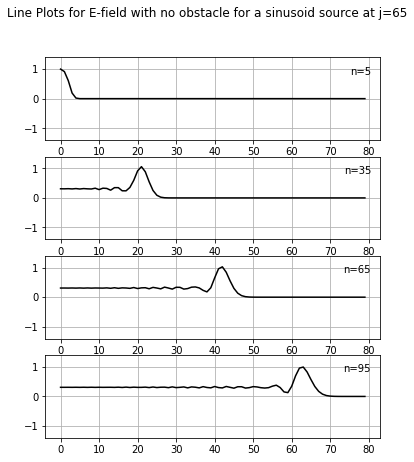

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


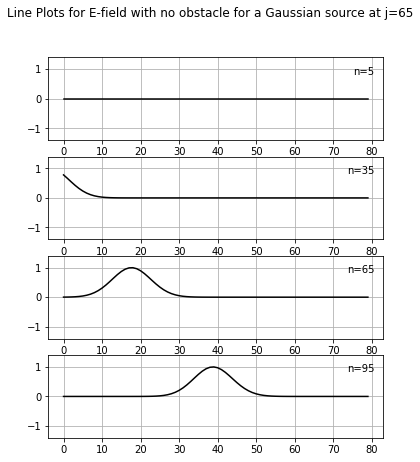

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


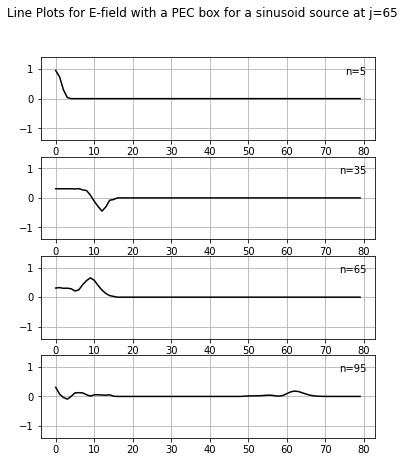

In [10]:
init_ex3()
iflaga = 1
define_media(iflaga)
define_coefficients()
source = 1
for x in range(nt):
    n = x+1
    adv_Ez(n, source)
    adv_H(n)
    #if n % 5 == 0:
        #my_surface_plot(Ez)
        #plt.title('3D plot of $E_z$ in free-space')
        #plt.show()

    if n == 5:
        Ez_5 = copy.deepcopy(Ez[:, strip-1])
    elif n == 35:
        Ez_35 = copy.deepcopy(Ez[:, strip-1])
    elif n == 65:
        Ez_65 = copy.deepcopy(Ez[:, strip-1])
    elif n == 95:
        Ez_95 = copy.deepcopy(Ez[:, strip-1])

my_line_plot(Ez_5, Ez_35, Ez_65, Ez_95, iflaga, source)
zeroing()

source = 2
define_media(iflaga)
define_coefficients()

for n in range(nt):
    adv_Ez(n, source)
    adv_H(n)
    if n == 5:
        Ez_5 = copy.deepcopy(Ez[:, strip-1])
    elif n == 35:
        Ez_35 = copy.deepcopy(Ez[:, strip-1])
    elif n == 65:
        Ez_65 = copy.deepcopy(Ez[:, strip-1])
    elif n == 95:
        Ez_95 = copy.deepcopy(Ez[:, strip-1])

my_line_plot(Ez_5, Ez_35, Ez_65, Ez_95, iflaga, source)
zeroing()

iflaga = 2
define_media(iflaga)
define_coefficients()
source = 1

for n in range(nt):
    adv_Ez(n, source)
    adv_H(n)
    #if n % 5 == 0:
        #my_surface_plot(Ez)
        #plt.title('3D plot of $E_z$ with PEC box')
        #plt.show()

    if n == 5-1:
        Ez_5 = copy.deepcopy(Ez[:, strip-1])
    elif n == 35-1:
        Ez_35 = copy.deepcopy(Ez[:, strip-1])
    elif n == 65-1:
        Ez_65 = copy.deepcopy(Ez[:, strip-1])
    elif n == 95-1:
        Ez_95 = copy.deepcopy(Ez[:, strip-1])

my_line_plot(Ez_5, Ez_35, Ez_65, Ez_95, iflaga, source)
zeroing()
define_media(iflaga)
define_coefficients()

for n in range(nt):
    adv_Ez(n, source)
    adv_H(n)
    #if n % 5 == 0:
        #my_surface_plot(Hx)
        #plt.title('3D plot of $H_x$ with PEC box')
        #plt.show()

zeroing()
define_media(iflaga)
define_coefficients()

for n in range(nt):
    adv_Ez(n, source)
    adv_H(n)
    #if n % 5 == 0:
        #my_surface_plot(Hy)
        #plt.title('3D plot of $H_y$ with PEC box')
        #plt.show()